<a href="https://colab.research.google.com/github/abhiraj-mengade/House_of_MDs/blob/main/Science%20%26%20Computation/1.%20Chemical%20Kinetics/Consecutive_and_Parallel_Chemical_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#1.1 Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
#2.1 Defining the Equations of Consecutive Reactions
def f(t, y, c):
    dydt =[-c[0]*y[0],c[0]*y[0]-c[1]*y[1] , c[1]*y[1]]
    return dydt

In [ ]:
#2.2 Define time spans, initial values, and constants
tspan = np.linspace(0, 10, 100) 
yinit = [5, 1, 0]
c = [0.8, 0.6]


In [ ]:
#2.3 Solving differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

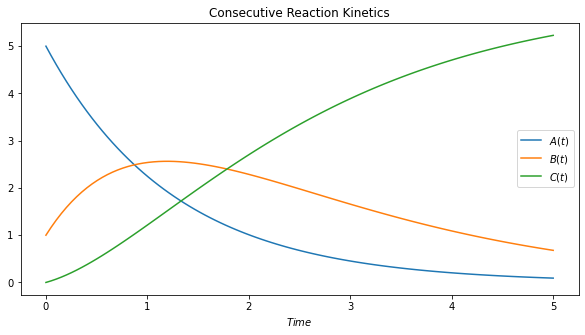

In [26]:
#2.4 Plotting the Graphs
Labels=["A","B","C"]
plt.figure(figsize=(10,5)) 
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'${Labels[i]}(t)$')
plt.title("Consecutive Reaction Kinetics")
plt.xlabel('$Time$') #the horizontal axis represents the time 
plt.legend() 
plt.show()

In [28]:
#3.1 Defining the Equations of Parallel Reactions
def f(t, y, c):
    dydt =[-(c[0]+c[1])*y[0],c[0]*y[0], c[1]*y[0]]
    return dydt

In [32]:
#3.2 Define time spans, initial values, and constants (Parallel Reaction)
tspan = np.linspace(0, 10, 100) 
yinit = [19, 1, 0]
c = [0.8, 0.6]

In [34]:
#3.3 Solving differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

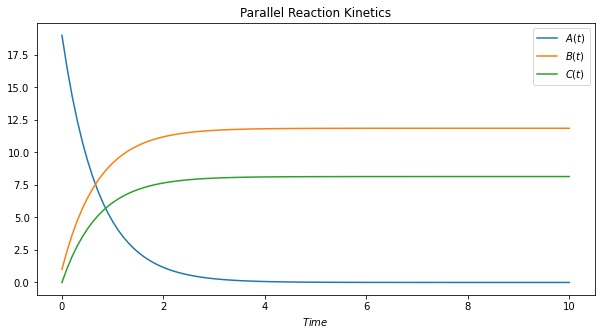

In [35]:
#3.4 Plotting the Graphs
Labels=["A","B","C"]
plt.figure(figsize=(10,5)) 
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'${Labels[i]}(t)$')
plt.title("Parallel Reaction Kinetics")
plt.xlabel('$Time$') #the horizontal axis represents the time 
plt.legend() 
plt.show()

More Complex Reactions. (2019, May 11). Retrieved September 1, 2021, from https://chem.libretexts.org/@go/page/41344